# Tomato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 11203 images belonging to 10 classes.


In [4]:
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.4983823  0.43955877 0.46700975]
  [0.5095732  0.4507497  0.47820067]
  [0.55934215 0.50051856 0.5279696 ]
  ...
  [0.4312709  0.37244737 0.39989835]
  [0.4333329  0.37450933 0.40196034]
  [0.4352438  0.37642026 0.40387124]]

 [[0.50250626 0.4436827  0.47113368]
  [0.5080268  0.44920322 0.4766542 ]
  [0.55264074 0.4938172  0.5212682 ]
  ...
  [0.42953068 0.37070715 0.39815813]
  [0.4284997  0.36967617 0.39712715]
  [0.42746872 0.3686452  0.39609617]]

 [[0.5066302  0.44780666 0.47525764]
  [0.5064803  0.44765672 0.4751077 ]
  [0.5459393  0.4871158  0.5145668 ]
  ...
  [0.4046694  0.34584585 0.37329686]
  [0.40054545 0.34172192 0.3691729 ]
  [0.39642152 0.33759797 0.36504894]]

 ...

 [[0.5767713  0.5257909  0.5532419 ]
  [0.5839882  0.5330078  0.5604588 ]
  [0.59120506 0.5402247  0.56767565]
  ...
  [0.61014825 0.55916786 0.58661884]
  [0.5915868  0.54060644 0.5680574 ]
  [0.54290926 0.49192885 0.51937985]]

 [[0.6201179  0.5691375  0.5965885 ]
  [0.62217987 0.5711995  0.59865046]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 3198 images belonging to 10 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1610 images belonging to 10 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.583146   0.5378893  0.59279126]
  [0.579966   0.5353454  0.59024733]
  [0.57678616 0.53280145 0.5877034 ]
  ...
  [0.6340693  0.645834   0.6654419 ]
  [0.6118389  0.6236036  0.6432114 ]
  [0.54172415 0.55348885 0.5730967 ]]

 [[0.45570442 0.4086456  0.46354756]
  [0.4976789  0.45062009 0.505522  ]
  [0.53965336 0.49259454 0.5474965 ]
  ...
  [0.6436089  0.65537363 0.6749815 ]
  [0.5953035  0.6070682  0.626676  ]
  [0.5353644  0.5471291  0.56673694]]

 [[0.39581537 0.35077208 0.40567404]
  [0.3761001  0.33042082 0.38532278]
  [0.35638478 0.31006956 0.36497152]
  ...
  [0.6531486  0.6649133  0.68452114]
  [0.5787681  0.5905328  0.6101406 ]
  [0.5290046  0.5407693  0.5603771 ]]

 ...

 [[0.4826553  0.48657686 0.5061847 ]
  [0.50789815 0.5118197  0.53142756]
  [0.4962311  0.5001527  0.51976055]
  ...
  [0.366474   0.3782387  0.41353282]
  [0.36083362 0.37259832 0.40789244]
  [0.36910135 0.38086605 0.41616017]]

 [[0.49496347 0.49888504 0.5184928 ]
  [0.5091658  0.5130874  0.53269523]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D((1, 1)),
    layers.Conv2D(64, (7, 7), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
11203/32

350.09375

In [14]:
3198/32

99.9375

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=350,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=99,
    verbose=1,
    epochs=20,
)

Epoch 1/20
350/350 [==============================] - 375s 1s/step - loss: 1.7307 - accuracy: 0.3823 - val_loss: 1.2181 - val_accuracy: 0.5912
Epoch 2/20
350/350 [==============================] - 368s 1s/step - loss: 0.9837 - accuracy: 0.6628 - val_loss: 0.8879 - val_accuracy: 0.6954
Epoch 3/20
350/350 [==============================] - 374s 1s/step - loss: 0.6645 - accuracy: 0.7693 - val_loss: 0.6217 - val_accuracy: 0.7854
Epoch 4/20
350/350 [==============================] - 373s 1s/step - loss: 0.5482 - accuracy: 0.8065 - val_loss: 0.4955 - val_accuracy: 0.8280
Epoch 5/20
350/350 [==============================] - 373s 1s/step - loss: 0.4375 - accuracy: 0.8452 - val_loss: 0.3911 - val_accuracy: 0.8665
Epoch 6/20
350/350 [==============================] - 372s 1s/step - loss: 0.3669 - accuracy: 0.8752 - val_loss: 0.3658 - val_accuracy: 0.8655
Epoch 7/20
350/350 [==============================] - 372s 1s/step - loss: 0.3266 - accuracy: 0.8856 - val_loss: 0.3903 - val_accuracy: 0.8655

In [16]:
scores = model.evaluate(test_generator)

51/51 [==============================] - 24s 465ms/step - loss: 0.1876 - accuracy: 0.9435


In [17]:
scores

[0.1876073032617569, 0.9434782862663269]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [29]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [30]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 350}

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [32]:
type(history.history['loss'])

list

In [33]:
len(history.history['loss'])

20

In [34]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.7306995391845703,
 0.9837371110916138,
 0.664518415927887,
 0.5481860637664795,
 0.43750348687171936]

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [36]:
val_acc

[0.591224730014801,
 0.6953914165496826,
 0.7853535413742065,
 0.8279671669006348,
 0.8664772510528564,
 0.8655303120613098,
 0.8655303120613098,
 0.8809974789619446,
 0.903724730014801,
 0.9150883555412292,
 0.9160353541374207,
 0.9185606241226196,
 0.875,
 0.9315025210380554,
 0.9176136255264282,
 0.9239267706871033,
 0.9371843338012695,
 0.9346590638160706,
 0.9444444179534912,
 0.9305555820465088]

In [37]:
acc

[0.3823292553424835,
 0.6627875566482544,
 0.769313395023346,
 0.8064631819725037,
 0.8452242612838745,
 0.8752126097679138,
 0.8855966329574585,
 0.9031420350074768,
 0.9099453687667847,
 0.9199713468551636,
 0.9271327257156372,
 0.9248052835464478,
 0.9354578852653503,
 0.9401127696037292,
 0.9442306160926819,
 0.9468265771865845,
 0.9475427269935608,
 0.9602542519569397,
 0.9558678865432739,
 0.9561364054679871]

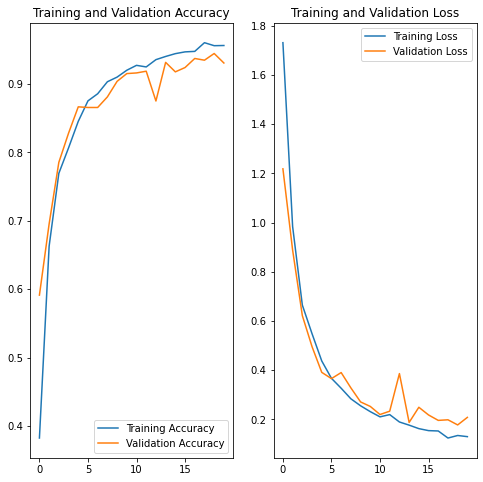

In [38]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Tomato__Tomato_YellowLeaf__Curl_Virus
predicted label: Tomato__Tomato_YellowLeaf__Curl_Virus


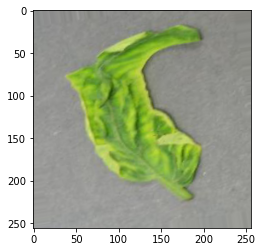

In [40]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

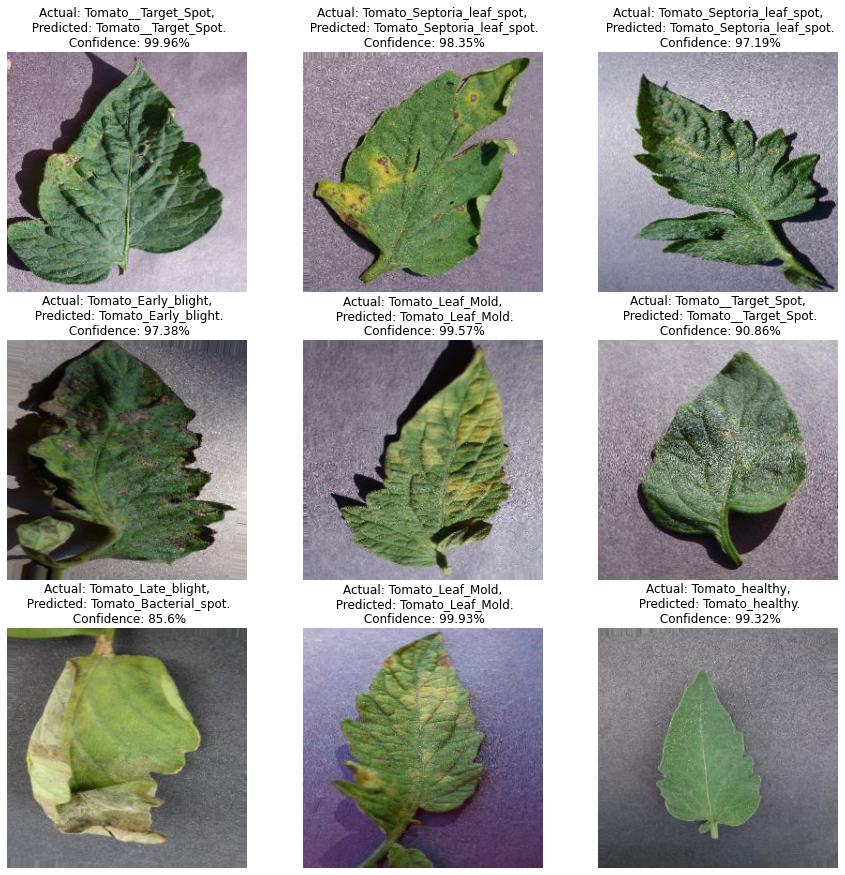

In [42]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [43]:
model.save("../potatoes.h5")